## XGBoost 학습

[0]	train-logloss:0.65108	test-logloss:0.65394
[1]	train-logloss:0.63806	test-logloss:0.65506
[2]	train-logloss:0.62065	test-logloss:0.65315
[3]	train-logloss:0.60400	test-logloss:0.65535
[4]	train-logloss:0.58679	test-logloss:0.65835
[5]	train-logloss:0.57146	test-logloss:0.65304
[6]	train-logloss:0.55640	test-logloss:0.64520
[7]	train-logloss:0.54409	test-logloss:0.64357
[8]	train-logloss:0.52929	test-logloss:0.63889
[9]	train-logloss:0.51574	test-logloss:0.64196
[10]	train-logloss:0.50290	test-logloss:0.64556
[11]	train-logloss:0.49170	test-logloss:0.64252
[12]	train-logloss:0.48280	test-logloss:0.64058
[13]	train-logloss:0.47251	test-logloss:0.63695
[14]	train-logloss:0.45828	test-logloss:0.63765
[15]	train-logloss:0.44770	test-logloss:0.63480
[16]	train-logloss:0.43745	test-logloss:0.62782
[17]	train-logloss:0.42873	test-logloss:0.62975
[18]	train-logloss:0.41997	test-logloss:0.62233
[19]	train-logloss:0.41083	test-logloss:0.61888
[20]	train-logloss:0.40217	test-logloss:0.61621
[2

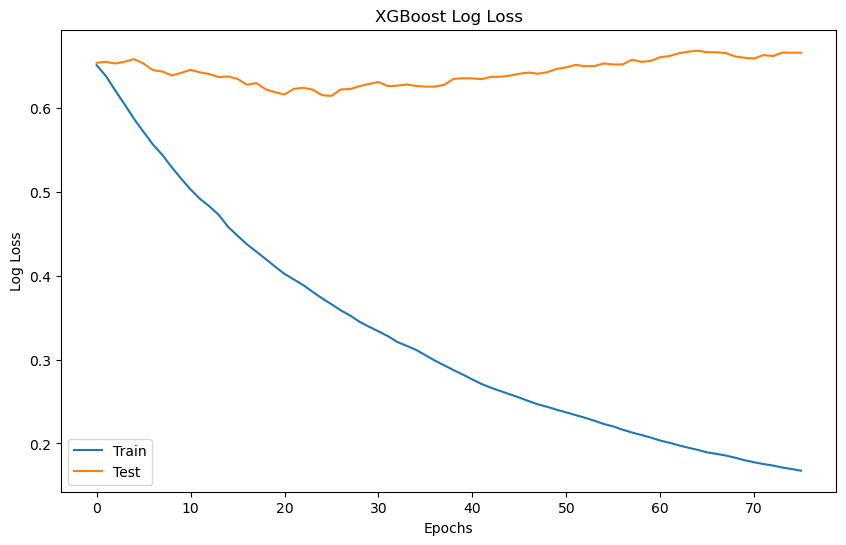

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt

#
data = pd.read_csv('1_train.csv', encoding='cp949')

#위험은 0, 안전은 1로 변환
data['상태'] = data['상태'].map({'위험': 0, '안전': 1})

# 특성과 라벨 분리
X = data.drop('상태', axis=1)
y = data['상태']

# 데이터를 8:2로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DMatrix 객체 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 모델 파라미터 설정 및 튜닝
params = {
    'max_depth': 5,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic', #이진 분류를 위해 'binary'사용
    'eval_metric': 'logloss'
}

# evals_result를 사용하여 평가 결과 기록
evals_result = {}

# 모델 훈련
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=50,
    evals_result=evals_result,
    verbose_eval=True
)

# 예측 수행
preds = bst.predict(dtest)

# 이진 분류 예측값을 0과 1로 변환
predictions = [1 if x > 0.5 else 0 for x in preds]

# 모델 평가
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Loss 그래프 그리기
epochs = len(evals_result['train']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, evals_result['train']['logloss'], label='Train')
plt.plot(x_axis, evals_result['test']['logloss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.legend()
plt.show()

GridSearch
<ul>
    <li>머신러닝에서 모델의 성능향상을 위해 쓰이는 기법중 하나</li>
    <li>값에 대한 경우의 수마다 예측 성능을 측정 평가하여 비교하면서 최적의 하이퍼 파라미터 값을 찾는 과정을 진행</li>
    <li>시간이 오래걸린다는 단점이 있음</li>
</ul>

Fitting 3 folds for each of 8640 candidates, totalling 25920 fits
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 500, 'subsample': 1.0}
Accuracy: 50.00%
[0]	train-logloss:0.60589	test-logloss:0.65926
[1]	train-logloss:0.56367	test-logloss:0.68215
[2]	train-logloss:0.52012	test-logloss:0.67715
[3]	train-logloss:0.47607	test-logloss:0.67703
[4]	train-logloss:0.44417	test-logloss:0.67083
[5]	train-logloss:0.41184	test-logloss:0.68481
[6]	train-logloss:0.39209	test-logloss:0.69983
[7]	train-logloss:0.37108	test-logloss:0.71371
[8]	train-logloss:0.34878	test-logloss:0.69923
[9]	train-logloss:0.32680	test-logloss:0.70864
[10]	train-logloss:0.30682	test-logloss:0.72333
[11]	train-logloss:0.29270	test-logloss:0.72807
[12]	train-logloss:0.28047	test-logloss:0.72408
[13]	train-logloss:0.26246	test-logloss:0.71734
[14]	train-logloss:0.25309	test-logloss:0.71599
[15]	train-logloss:0.24127	test-logloss:0.71674
[16]	train-logloss:0.23324	test-loglos

[166]	train-logloss:0.03361	test-logloss:1.00464
[167]	train-logloss:0.03347	test-logloss:1.00682
[168]	train-logloss:0.03337	test-logloss:1.01063
[169]	train-logloss:0.03331	test-logloss:1.01026
[170]	train-logloss:0.03309	test-logloss:1.00896
[171]	train-logloss:0.03303	test-logloss:1.00883
[172]	train-logloss:0.03289	test-logloss:1.01140
[173]	train-logloss:0.03278	test-logloss:1.01410
[174]	train-logloss:0.03273	test-logloss:1.01393
[175]	train-logloss:0.03268	test-logloss:1.01356
[176]	train-logloss:0.03254	test-logloss:1.01494
[177]	train-logloss:0.03241	test-logloss:1.01816
[178]	train-logloss:0.03228	test-logloss:1.01868
[179]	train-logloss:0.03223	test-logloss:1.02047
[180]	train-logloss:0.03216	test-logloss:1.02080
[181]	train-logloss:0.03211	test-logloss:1.02066
[182]	train-logloss:0.03201	test-logloss:1.01863
[183]	train-logloss:0.03197	test-logloss:1.01707
[184]	train-logloss:0.03187	test-logloss:1.01807
[185]	train-logloss:0.03182	test-logloss:1.01807
[186]	train-logloss:

[334]	train-logloss:0.02652	test-logloss:1.02934
[335]	train-logloss:0.02649	test-logloss:1.03024
[336]	train-logloss:0.02647	test-logloss:1.02994
[337]	train-logloss:0.02644	test-logloss:1.02873
[338]	train-logloss:0.02642	test-logloss:1.02878
[339]	train-logloss:0.02639	test-logloss:1.03162
[340]	train-logloss:0.02637	test-logloss:1.03235
[341]	train-logloss:0.02634	test-logloss:1.03176
[342]	train-logloss:0.02632	test-logloss:1.03270
[343]	train-logloss:0.02629	test-logloss:1.03205
[344]	train-logloss:0.02627	test-logloss:1.03248
[345]	train-logloss:0.02624	test-logloss:1.03279
[346]	train-logloss:0.02622	test-logloss:1.03295
[347]	train-logloss:0.02620	test-logloss:1.03385
[348]	train-logloss:0.02617	test-logloss:1.03209
[349]	train-logloss:0.02615	test-logloss:1.03151
[350]	train-logloss:0.02612	test-logloss:1.03086
[351]	train-logloss:0.02610	test-logloss:1.02830
[352]	train-logloss:0.02607	test-logloss:1.02976
[353]	train-logloss:0.02605	test-logloss:1.02912
[354]	train-logloss:

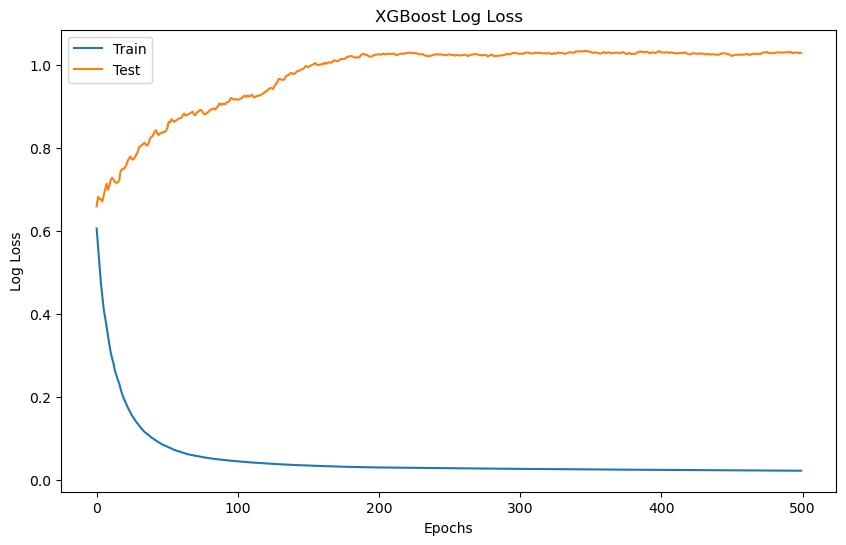

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

# 데이터 로드
data = pd.read_csv('1_train.csv', encoding='cp949')

# 위험은 0, 안전은 1로 변환
data['상태'] = data['상태'].map({'위험': 0, '안전': 1})

# 특성과 라벨 분리
X = data.drop('상태', axis=1)
y = data['상태']

# 데이터를 8:2로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 분류기 생성
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# 파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 200, 300, 400, 500]
}

# Grid Search 설정
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# 학습 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print(f"Best parameters: {grid_search.best_params_}")

# 최적의 파라미터로 모델 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 최적의 파라미터로 DMatrix 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# evals_result를 사용하여 평가 결과 기록
evals_result = {}

# 최적의 파라미터로 다시 모델 훈련 (여기서는 xgb.train을 사용)
best_params = grid_search.best_params_
params = {
    'max_depth': best_params['max_depth'],
    'learning_rate': best_params['learning_rate'],
    'subsample': best_params['subsample'],
    'colsample_bytree': best_params['colsample_bytree'],
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=best_params['n_estimators'],
    evals=[(dtrain, 'train'), (dtest, 'test')],
    evals_result=evals_result,
    verbose_eval=True
)

# Loss 그래프 그리기
epochs = len(evals_result['train']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, evals_result['train']['logloss'], label='Train')
plt.plot(x_axis, evals_result['test']['logloss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.legend()
plt.show()